# U.S. Medical Insurance Costs

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [4]:
df.value_counts()

age  sex     bmi     children  smoker  region     charges    
19   male    30.590  0         no      northwest  1639.56310     2
47   male    29.830  3         no      northwest  9620.33070     1
48   female  25.850  3         yes     southeast  24180.93350    1
             22.800  0         no      southwest  8269.04400     1
47   male    47.520  1         no      southeast  8083.91980     1
                                                                ..
31   female  25.740  0         no      southeast  3756.62160     1
             23.600  2         no      southwest  4931.64700     1
             21.755  0         no      northwest  4134.08245     1
30   male    44.220  2         no      southeast  4266.16580     1
64   male    40.480  0         no      southeast  13831.11520    1
Name: count, Length: 1337, dtype: int64

In [5]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Average charges by smoker status:
smoker
no      8434.268298
yes    32050.231832
Name: charges, dtype: float64


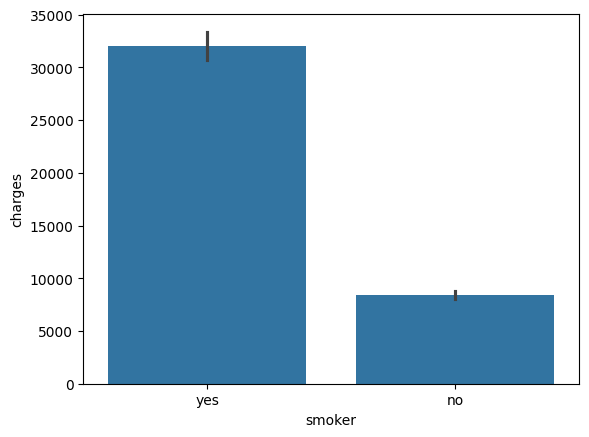


Average BMI by region:
region
northeast    29.173503
northwest    29.199785
southeast    33.355989
southwest    30.596615
Name: bmi, dtype: float64


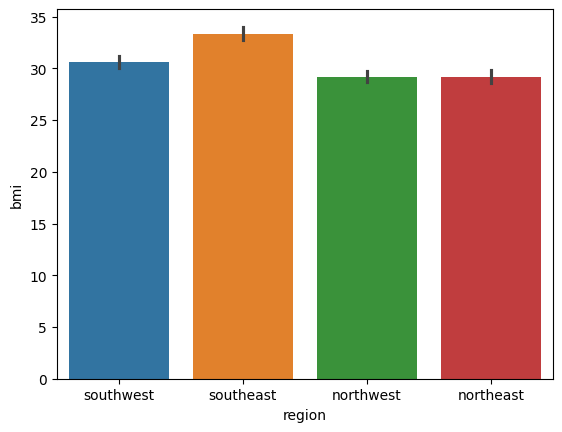


Correlation between age and charges:
0.29900819333064776

Count of smokers and non-smokers:
smoker
no     1064
yes     274
Name: count, dtype: int64


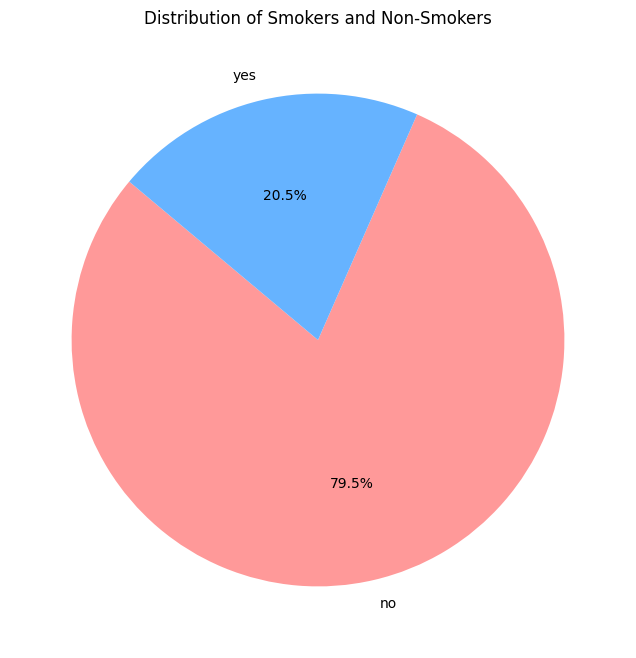


Count of individuals by region:
region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64


In [7]:
class InsuranceAnalysis:
    def __init__(self, dataframe):
        self.df = dataframe
    
    def average_charges_by_smoker(self):
        return self.df.groupby('smoker')['charges'].mean()
    
    def average_bmi_by_region(self):
        return self.df.groupby('region')['bmi'].mean()
    
    def correlation_age_charges(self):
        return self.df['age'].corr(self.df['charges'])
    
    def count_smokers(self):
        return self.df['smoker'].value_counts()
    
    def count_by_region(self):
        return self.df['region'].value_counts()

# Create an instance of the InsuranceAnalysis class
analysis = InsuranceAnalysis(df)

# Example usage
print("Average charges by smoker status:")
print(analysis.average_charges_by_smoker())
sns.barplot(data=df, x='smoker', y='charges')
plt.show()

print("\nAverage BMI by region:")
print(analysis.average_bmi_by_region())
sns.barplot(data=df, x='region', y='bmi', hue='region')
plt.show()

print("\nCorrelation between age and charges:")
print(analysis.correlation_age_charges())

print("\nCount of smokers and non-smokers:")
print(analysis.count_smokers())
# Count the number of smokers and non-smokers
smoker_counts = df['smoker'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(smoker_counts, labels=smoker_counts.index, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff'])
plt.title('Distribution of Smokers and Non-Smokers')
plt.show()

print("\nCount of individuals by region:")
print(analysis.count_by_region())

In [8]:
le = LabelEncoder()

df['sex'] = le.fit_transform(df['sex'])
df['smoker'] = le.fit_transform(df['smoker'])
df['region'] = le.fit_transform(df['region'])

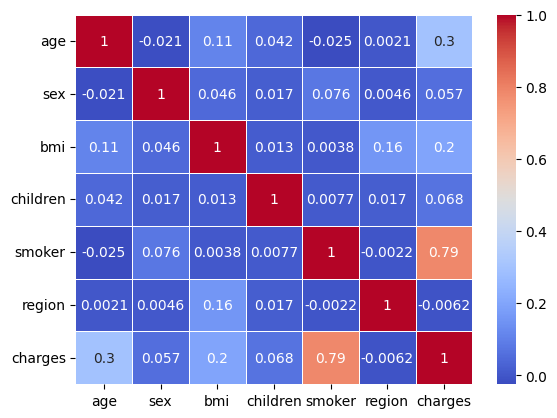

In [10]:
corr_matrix = df.corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.show()

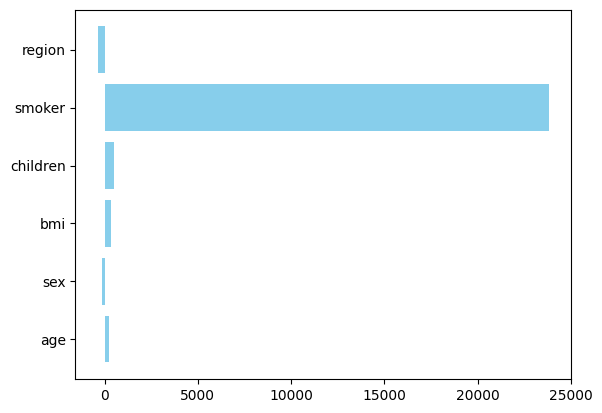

Feature: age, Coefficient: 257.2880748580621
Feature: sex, Coefficient: -131.1105796220939
Feature: bmi, Coefficient: 332.57013224229644
Feature: children, Coefficient: 479.369393545127
Feature: smoker, Coefficient: 23820.434122672927
Feature: region, Coefficient: -353.6400165588389


In [9]:
X = df.drop('charges', axis=1)
y = df['charges']

model = LinearRegression()
model.fit(X,y)

importance = model.coef_
features = X.columns

plt.barh(features, importance, color='skyblue')
plt.show()

for i, v in enumerate(importance):
    print(f'Feature: {features[i]}, Coefficient: {v}')

## Multiple visualizations and feature analysis clearly show a correlation between whether a person is a smoker or not and the costs associated with medical insurance. 